<a href="https://www.kaggle.com/mohamedbakrey/make-a-processing-classification-for-tweets?scriptVersionId=87426646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

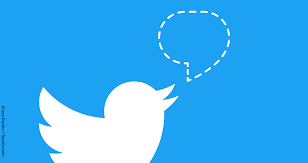

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
# for regular expressions
import re
from nltk.stem.porter import PorterStemmer

In [2]:
train_df=pd.read_csv('../input/nlp-getting-started/train.csv')

# عرض اول عشر صفوف

In [3]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# عرض بعض المعلومات عن البيانات

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
print("Shape of Data is: ",train_df.shape)


Shape of Data is:  (7613, 5)


# عمل تنظيف للبيانات 

In [6]:
train_df.drop(['id','keyword', 'location'], axis=1)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


# إزالة علامات الترقيم والأرقام

In [7]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

train_df['text'] = train_df['text'].apply(punctuation_removal)

In [8]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train_df['text'] = train_df['text'].apply(drop_numbers)

In [9]:
train_df['text'].head()

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    Just got sent this photo from Ruby Alaska as s...
Name: text, dtype: object

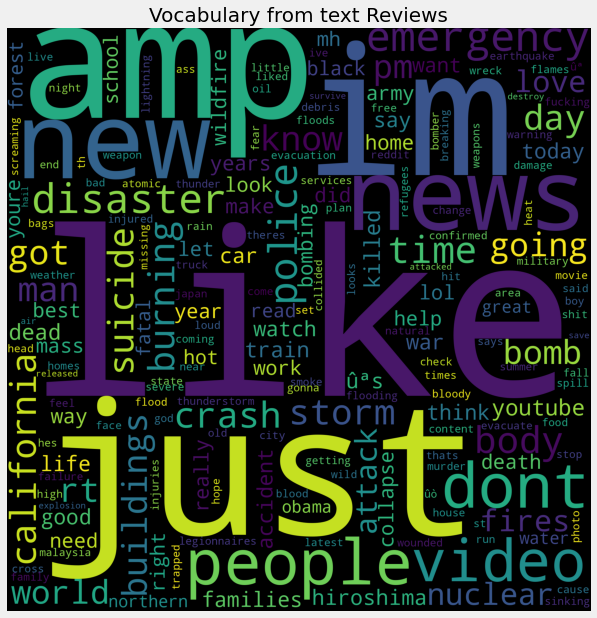

In [10]:
# lets plot the Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df['text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from text Reviews", fontsize = 20)
plt.show()

# Feature Extraction

 ### Bag of Words

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [11]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
df=cv.fit_transform(train_df['text']).toarray()
x = df[:,[ 0]]
y = train_df['target'].values

print(x.shape)
print(y.shape)

(7613, 1)
(7613,)


In [12]:
print("Shape of X:",len(x))
print("Shape of Y:",len(y))

Shape of X: 7613
Shape of Y: 7613


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classification

In [15]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000)
classifier1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1000)

In [16]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
print('Y_pred :',y_pred)

Y_pred : [0 0 0 ... 0 0 0]


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1107,    0],
       [ 797,    0]])

In [18]:
score=classifier1.score(X_test,y_pred)
score

1.0

## Random Forest Classification

In [19]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1107,    0],
       [ 797,    0]])

In [22]:
score=classifier.score(X_test,y_pred)
score

1.0

In [23]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

train_df['text'] = train_df['text'].apply(remove_stopword)

In [25]:
train_df['text'].values

array(['Our Deeds Reason earthquake May ALLAH Forgive us',
       'Forest fire near La Ronge Sask Canada',
       'All residents asked shelter place notified officers No evacuation shelter place orders expected',
       ..., 'M UTCkm S Volcano Hawaii httptcozDtoydEbJ',
       'Police investigating ebike collided car Little Portugal Ebike rider suffered serious nonlife threatening injuries',
       'The Latest More Homes Razed Northern California Wildfire ABC News httptcoYmYrSkQd'],
      dtype=object)

# تصنيف الكلمات الى السلبى والايجابى

In [26]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
train_df['polarity'] = train_df['text'].apply(get_polarity)

In [27]:
train_df['polarity'].value_counts()

Neutral              3686
Weakly Positive      1362
Weakly Negative      1057
Positive              798
Negative              354
Strongly Positive     194
Strongly Negative     131
Name: polarity, dtype: int64